In [84]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Data loading and preprocessing

In [85]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# data standardization
# ---todo---
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into an 80% training dataset and a 20% testing dataset.

In [86]:
# Split the dataset into the training and testing dataset
# ---todo---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)



# Define and train the SVM model

In [87]:
# ---todo---
svm_model = svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time


# Evaluate the model

In [88]:
# ---todo---
y_train_pred = svm_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
y_test_pred = svm_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Training runtime: {training_time:.4f} seconds")
print(f"Test accuracy: {test_acc:.4f}")


Training accuracy: 0.9750
Training runtime: 0.0034 seconds
Test accuracy: 1.0000


# Visualize decision boundaries
If needed, use PCA to reduce features to 2D for visualization

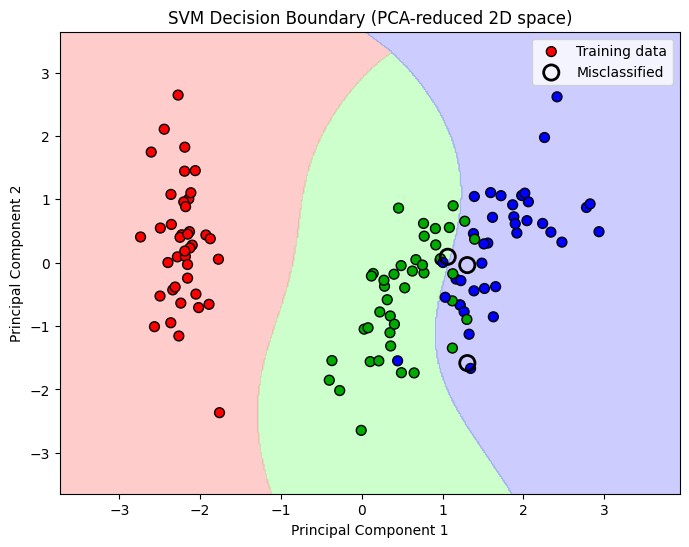

In [89]:
# ---todo---
#PCA to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

#use the 2D data to train the model
svm_pca = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale'
)
svm_pca.fit(X_train_pca, y_train)

#create mesh grid for boundary drawing
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])

# decision regions
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# training samples
plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=y_train, cmap=cmap_bold,
    edgecolor='k', s=50, label='Training data'
)

#label the misclassified samples
y_test_pred = svm_pca.predict(X_test_pca)
mis_idx = (y_test_pred != y_test)

plt.scatter(
    X_test_pca[mis_idx, 0],
    X_test_pca[mis_idx, 1],
    facecolors='none',
    edgecolors='k',
    s=120,
    linewidths=2,
    label='Misclassified'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary (PCA-reduced 2D space)')
plt.legend()
plt.show()

# Visualize MLP decision boundaries

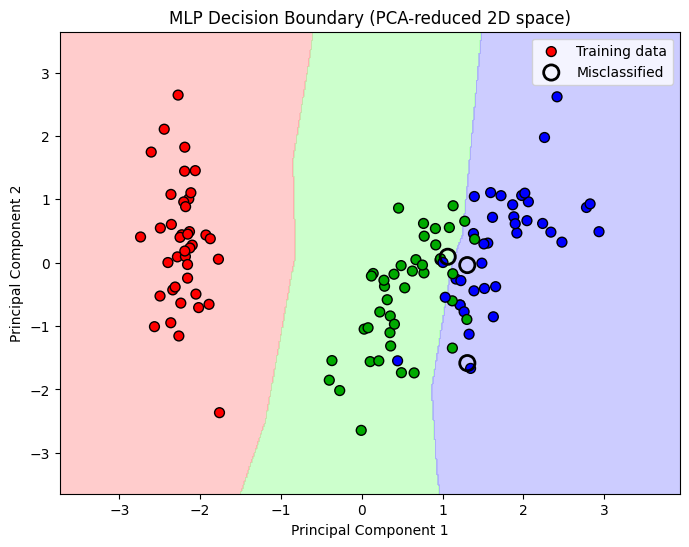

In [90]:
class MLP2D(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 3)
        )

    def forward(self, x):
        return self.net(x)

mlp_pca = MLP2D()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_pca.parameters(), lr=0.01)
X_pca_tensor = torch.FloatTensor(X_train_pca)
y_pca_tensor = torch.LongTensor(y_train)

for _ in range(200):
    outputs = mlp_pca(X_pca_tensor)
    loss = criterion(outputs, y_pca_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.FloatTensor(grid)

mlp_pca.eval()
with torch.no_grad():
    logits = mlp_pca(grid_tensor)
    Z = torch.argmax(logits, dim=1).numpy()

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])

# decision regions
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# training samples
plt.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1],
    c=y_train, cmap=cmap_bold,
    edgecolor='k', s=50, label='Training data'
)

with torch.no_grad():
    test_logits = mlp_pca(torch.FloatTensor(X_test_pca))
    test_pred = torch.argmax(test_logits, dim=1).numpy()

mis_idx = (test_pred != y_test)

plt.scatter(
    X_test_pca[mis_idx, 0],
    X_test_pca[mis_idx, 1],
    facecolors='none',
    edgecolors='k',
    s=120,
    linewidths=2,
    label='Misclassified'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MLP Decision Boundary (PCA-reduced 2D space)')
plt.legend()
plt.show()

# SVM Classification Confidence

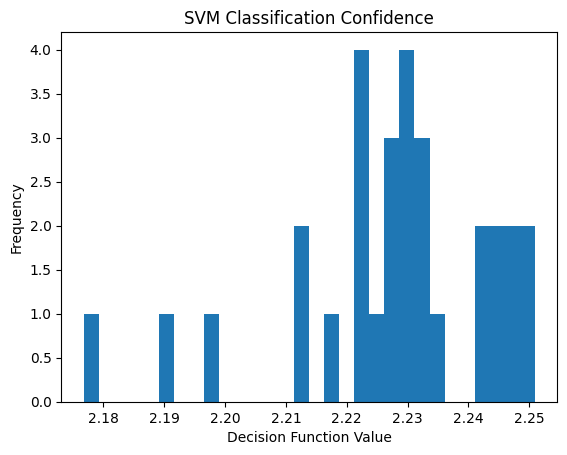

In [91]:
svm_confidence = svm_model.decision_function(X_test)
plt.hist(np.max(svm_confidence, axis=1), bins=30)
plt.title("SVM Classification Confidence")
plt.xlabel("Decision Function Value")
plt.ylabel("Frequency")
plt.show()

# Visualize the comparation with MLP results

In [92]:
# ---todo---
results = pd.DataFrame({
    "Model": ["SVM", "MLP"],
    "Training Accuracy": [0.9750, 0.9833],
    "Testing Accuracy": [1.0000, 1.0000],
    "Runtime (seconds)": [0.0325, 0.5851]
})

results

,Model,Training Accuracy,Testing Accuracy,Runtime (seconds)
0,SVM,0.9750,1.0,0.0325
1,MLP,0.9833,1.0,0.5851
